

###                                      EDSA Apple Price  kaggle Challenge - TS3 Regression


![Random Unsplash Image](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Golden_Delicious_apples.jpg/330px-Golden_Delicious_apples.jpg)







#### Objective

We are going to construct a regression algorithm that will accurately predict the price of the Golden Delicious Apples given the conditions. 

We will use the data science process (Project life cycle):


   
### - Data Collection and Cleaning

 Null values 

 Missing Values

 Duplicate values  
 

### - EDA 
- Investigate the data through descriptive statistics and visualisation tools (EDA)
  Understand the pattern in the data
  Determine relationship between the variables and Discover outliers in the data        
  
### -Build Model
- Build the model that will allow us to accurately predict the price of the Golden Apples (Model building)
  Select the variables that are relevant in making the price decisions
  
### -Model Deployment




- Deploy our model, and enter the Kaggle competition!

# Importing Python libraries

We will first import all the libraries needed for our journey

In [2]:
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Regression
from sklearn.linear_model import LinearRegression

#Add more as we need

# Data Collection

# Importing the data

We will import our data here

In [3]:
df_train=pd.read_csv('https://raw.githubusercontent.com/rlatndgb/EDSA-TS3-Regression/main/df-train_set.csv', index_col=0)


In [4]:
df_train.head()

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [6]:
# Importing the test data

df_test = pd.read_csv('https://raw.githubusercontent.com/rlatndgb/EDSA-TS3-Regression/main/df-test_set.csv', index_col=0)

In [8]:
#First 5 rows
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
Index,,,,,,,,,,,,
1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


# 2. Data Cleaning

Let's have a quick overview of our dataset!

In [11]:
#Check the shape of our dataframe 
df_train.shape   #64376 rows and 12 columns

(64376, 12)

In [13]:
#### Tebogo start
df_train.isnull().sum() #finding null values

Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

##### Hence we can see there are no null values in our data

Our data consists of **685 rows** and **12 columns**

In [16]:
#Detailed information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


The info command allowed us to confirm that there are **12** variables, some **categorical** and some **numerical**.
We do not have any null values

In [20]:
df.isnull().sum()

Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [17]:
#function that determines missing values within a specific column
def total_missing(df,column_name):
    # your code here


    return df[column_name].isnull().sum()


In [19]:
total_missing(df_train,'avg_price_per_kg') # finding missing values in our target variable

0

#### hence yes there are  no null values

# 3. Exploratory Data Analysis

Let's have a look at some descriptive statistics of our data.

This includes, the **count, mean, standard deviation, minimum, Q1, median, Q3 and maximum value**.

In [21]:
round(df_train.describe(), 2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.00,64376.00,64376.00,64376.00,64376.00,64376.00,64376.00,64376.00
mean,12.78,75.65,89.61,19395.01,446.10,3336.64,477.65,NaN
std,35.94,159.51,172.22,44421.92,1184.17,7682.30,1453.89,NaN
min,0.12,1.00,1.00,-57700.00,-595.00,-5040.00,-512.00,-inf
25%,7.00,30.00,35.00,1154.00,20.00,175.00,0.00,4.02
50%,10.00,46.00,55.00,5400.00,107.00,940.00,76.00,6.00
75%,11.00,80.00,100.00,18772.00,390.00,3250.00,381.00,8.67
max,500.00,4400.00,4400.00,1134701.00,39453.00,192230.00,93193.00,inf


From the above clearly there are some values which we do not want especially in the target variable

The train data contains some nagative values, and there are also inf values. Let's see what those are

### Credit to the Author of the Main branch

In [25]:

#we can now see the dfataframe with the negative and inf values

df_train[df_train['Sales_Total'] < 0].head()

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
CAPE,BN150,2U,15.0,ORANGE MIDNIGHTS,2020-09-01,55.0,55.0,-2805.0,-51,-765.0,51,3.67
EASTERN FREESTATE,PP100,4M,10.0,POTATO (WASHED) MONDIAL,2020-05-04,5.0,5.0,-1080.0,0,0.0,0,-inf
CAPE,EC120,1L,12.0,APPLE BRAEBURN,2020-07-20,64.0,80.0,-944.0,1,12.0,0,-78.67
KWAZULU NATAL,PP100,3M,10.0,POTATO VALOR (WASHED),2019-12-23,25.0,32.0,-9161.0,-297,-2970.0,772,3.08
CAPE,AZ035,1S,3.5,ORANGE NAVELS,2020-07-15,10.0,12.0,-6600.0,-200,-700.0,696,9.43


In [26]:
# Lets look at inf values

df_train[(df_train['avg_price_per_kg']) > 1000]

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
WESTERN CAPE - CERES,AF070,2M,7.00,ONIONS BROWN,2020-05-09,54.0,54.0,10780.0,0,0.00,0,inf
W.CAPE-BERGRIVER ETC,M4183,1S,18.30,APPLE GALA,2020-06-13,100.0,100.0,1820.0,0,0.00,0,inf
NATAL,A1001,1M,0.12,GARLIC LOCAL,2020-07-06,50.0,200.0,400.0,3,0.36,49,1111.11
NATAL,A1001,1M,0.12,GARLIC LOCAL,2020-06-27,150.0,150.0,150.0,1,0.12,48,1250.00


It seems that the erratic values (negative values and infinity values) are not a concern of the APPLE GOLDEN DELICIOUS.

The simplest solution would be to subset our data so that we only look at the APPLE GOLDEN DELICIOUS.

In [27]:
df_AGD = df_train[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS']
df_AGD.head()

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [31]:
df_AGD.index

Index(['CAPE', 'CAPE', 'W.CAPE-BERGRIVER ETC', 'CAPE', 'EASTERN CAPE', 'CAPE',
       'CAPE', 'CAPE', 'NATAL', 'W.CAPE-BERGRIVER ETC',
       ...
       'W.CAPE-BERGRIVER ETC', 'W.CAPE-BERGRIVER ETC', 'CAPE', 'CAPE',
       'EASTERN CAPE', 'NATAL', 'ORANGE FREE STATE', 'CAPE', 'CAPE',
       'W.CAPE-BERGRIVER ETC'],
      dtype='object', name='Province', length=1952)

In [33]:
df_AGD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, CAPE to W.CAPE-BERGRIVER ETC
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Container         1952 non-null   object 
 1   Size_Grade        1952 non-null   object 
 2   Weight_Kg         1952 non-null   float64
 3   Commodities       1952 non-null   object 
 4   Date              1952 non-null   object 
 5   Low_Price         1952 non-null   float64
 6   High_Price        1952 non-null   float64
 7   Sales_Total       1952 non-null   float64
 8   Total_Qty_Sold    1952 non-null   int64  
 9   Total_Kg_Sold     1952 non-null   float64
 10  Stock_On_Hand     1952 non-null   int64  
 11  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 198.2+ KB


In [60]:
list(df_AGD.columns)

['Container',
 'Size_Grade',
 'Weight_Kg',
 'Commodities',
 'Date',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Qty_Sold',
 'Total_Kg_Sold',
 'Stock_On_Hand',
 'avg_price_per_kg']

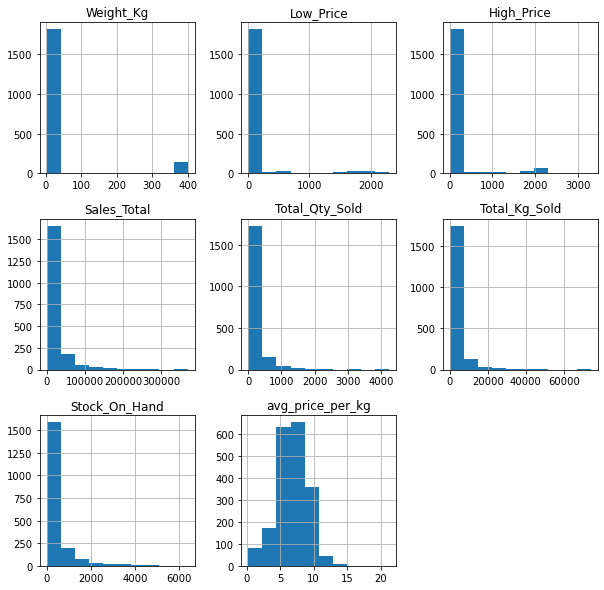

In [61]:
features = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'] # create a list of all numerical features
df_AGD[features].hist(figsize=(10,10));



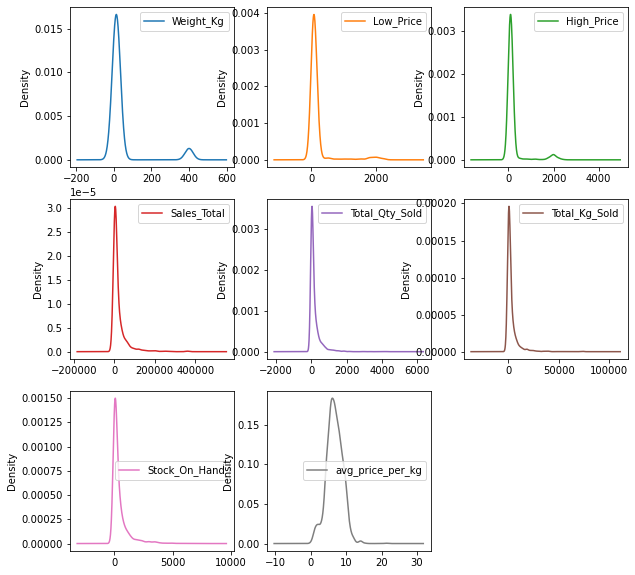

In [65]:
df_AGD[features].plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10, 10));

 from the above we can see that our train dataset has got the index as provinces 

Is our data in Gausian form? Let's have a look at the skewness and kurtosis of our data!

Kurtosis is the measure of outliers: **High kurtosis (>3)** indicates large number of outliers and **low kurtosis (<3)** indicates a lack of outliers.

Skewness indicates the symmetry of the data

In [67]:
df_AGD.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

## The kurtosis shows that there are many outliers in our dataset. We will bear this in our mind when we visualise the data. 

In [25]:
df.skew()

Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64

All our data have skewnesss > 1. Which tells us that it has a high positive skew. Hence the Mean is greater than the Median

Let's determine if there are any linear relationship betweem using Pearson's correlation. 

For now, we are assumung that our data is normal (we will log transform it later)

#### Multivariate Analysis: Non-graphic and graphic

In [73]:
df_AGD.corr()



,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


Let's make a visualisation for easier interpretation.

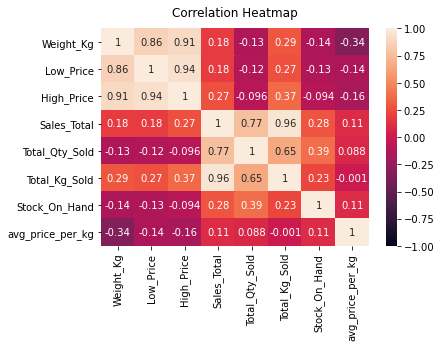

In [72]:
heatmap = sns.heatmap(df_AGD.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


Positive correlation is measured on a 0.1 to 1.0 scale. Weak positive correlation would be in the range of 0.1 to 0.3, moderate positive correlation from 0.3 to 0.5, and strong positive correlation from 0.5 to 1.0. The stronger the positive correlation, the more likely the stocks are to move in the same direction

-------------------------------------------------------------------------------------------------------------------------------

At this point, we should think which variables are redundant.

For instance, do we want to keep total qty sold AND totla kg sold? Are they not the same in some sense?

Also, we should think about which variables / features are relavant in making our model. (Feature selection)

--------------------------------------------------------------------------------------------------------------------------------

## Before we move on to the Model build section
lets think about the theoretical guidelines about the relationships of the features mathematically  

## Correlations to (avg price /kg ) 

#### where avg price/kg is our Target Variable


Weight ~ - 0.33

Low_Price ~ -0.14

High_Price ~ -0.16 </n>

$$avg Price per kg  = \frac{(High + Low)/2}{Weight}$$ 

Now if we were to look strictly at the average price exclude kg part

$$avg Price = \frac{(High + Low)/2}{N}$$ 

BUT on this predict and the Train data set the avg Price per kg is

$$avg Price per kg  = \frac{total Sales}{Total Kg Sold}$$ 

Bare in Mind we are not using the feature selection or other feature engineering techniques yet we are just trying to make sense Mathematically before we use any tool

Now Basically we have 5 very important variables

### Total sales ,Total kg Sold , High Price , Low Price , weight

but im not saying we should ignore the other variables

These are the things we have to consider when we now using the feature selection part or plotting our visuals meaning to choose the best Model we have to choose the most critical variables or Rather the X value (s)

### Brief discussion
--------------------------------------------------------------------------------------------------------------------------------
eventually another important question does it make sense to make the Total sales as an independent variable as in like avg price vs total sales

are these two variables the same thing is just that avg price is quantified whereas total sales is just the sum total of apples 

because both this variables are prices of the same thing

this was just a brief thinking for us to guide us into the right direction when we will be choosing the correct model

--------------------------------------------------------------------------------------------------------------------------------

# Pre-Model building

Simple Linear Regression: Least Squares

$$\hat{y}_i = a + bx_i$$   



In [137]:
df_AGD.head() #recap on our dataframe

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


Let's use one predictor, Sales_Total for our univariate model

In [150]:
df_uni_sales = df_AGD[['Sales_Total', 'avg_price_per_kg']]
df_uni_sales.columns = ['X', 'Y']
df_uni.head()

,X,Y
Province,,
CAPE,18.3,8.51
CAPE,11.0,4.55
W.CAPE-BERGRIVER ETC,9.0,6.11
CAPE,18.3,4.51
EASTERN CAPE,400.0,4.50


In [142]:
df_uni_W = df_AGD[['Weight_Kg', 'avg_price_per_kg']]
df_uni_W.columns = ['X', 'Y']
df_uni_W.head()

,X,Y
Province,,
CAPE,18.3,8.51
CAPE,11.0,4.55
W.CAPE-BERGRIVER ETC,9.0,6.11
CAPE,18.3,4.51
EASTERN CAPE,400.0,4.50


In [107]:
len(df_uni_W.Y)
          

1952

In [108]:
df_uni_W['X'].describe()

count    1952.000000
mean       40.460912
std        99.655169
min         3.000000
25%         9.000000
50%        12.000000
75%        18.300000
max       400.000000
Name: X, dtype: float64

# Basic regression!

In [111]:
from matplotlib.axis import Axis

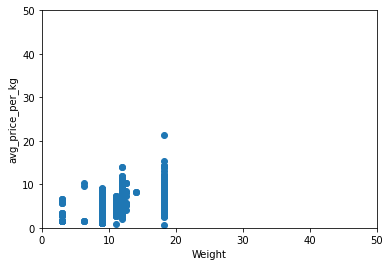

In [138]:
a=plt.scatter(df_uni_W['X'], df_uni['Y'])
plt.ylabel("avg_price_per_kg")
plt.xlabel("Weight")
plt.axis([0, 50, 0, 50])# zooming in the data
plt.show(a)

In [154]:
dummy=df_uni_W[df_uni_W['X'] == 3.0]
dummy

,X,Y
Province,,
NATAL,3.0,3.33
CAPE,3.0,6.00
NATAL,3.0,1.67
CAPE,3.0,6.00
CAPE,3.0,6.00
W.CAPE-BERGRIVER ETC,3.0,5.67
NATAL,3.0,1.67
NATAL,3.0,1.67
CAPE,3.0,6.00


In [157]:
df_uni_W['X'].unique()

array([ 18.3,  11. ,   9. , 400. ,  12. ,   3. ,  12.5,   6.3,  14. ])

In [163]:
df_uni_W['X'].unique()

array([ 18.3,  11. ,   9. , 400. ,  12. ,   3. ,  12.5,   6.3,  14. ])

In [170]:
#dumsdum =df_uni_W.drop_duplicates(['Weight_Kg'])
#dumsdum

### This means the average prices fluctuates for group of apples with weight= 3   kg across different provinces 
clearly there is some variable or factor that makes a causal change

# Perhaps season ? Date variable ?

In [144]:
df_uni_Stock = df_AGD[['Stock_On_Hand', 'avg_price_per_kg']]
df_uni_Stock.columns = ['X', 'Y']
df_uni_Stock.head()

,X,Y
Province,,
CAPE,822,8.51
CAPE,0,4.55
W.CAPE-BERGRIVER ETC,1506,6.11
CAPE,443,4.51
EASTERN CAPE,2,4.50


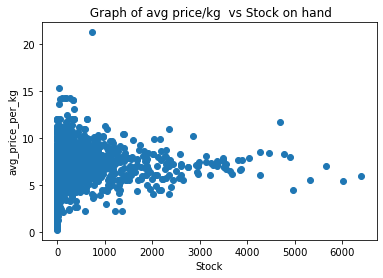

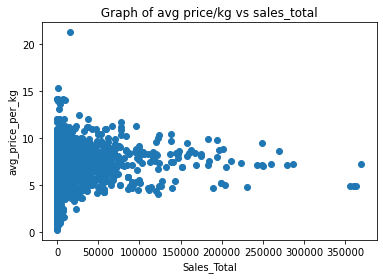

In [171]:
a=plt.scatter(df_uni_Stock['X'], df_uni_Stock['Y'])
plt.ylabel("avg_price_per_kg")
plt.xlabel("Stock")
#plt.axis([0, 50, 0, 50])# zooming in the data
plt.title(" Graph of avg price/kg  vs Stock on hand")
plt.show(a)

plt.scatter(df_uni_sales['X'], df_uni_sales['Y'])
plt.ylabel("avg_price_per_kg")
plt.xlabel("Sales_Total")
plt.title(" Graph of avg price/kg vs sales_total ")

plt.show()

--------------------------------------------------------------------------------------------------------------------------------
BASED ON THE CORRELATION table CO-efficients of the variables 
it only shows variables which have a weak positive correlation 
which are Total_sales, Stock on hand 

both the total sales and stock on hand have similar scatter plots because they have similar correlations to the avg price/kg

WHICH is a 0.11 Correlation

--------------------------------------------------------------------------------------------------------------------------------

 # hence
 I suggest we model check The Stock at Hand variable perhaps it might yield something better 
 and compare it with the variables that remain with the feature variance and threshold



### Getting model predictions

### Assess the accuracy of our model

Residual Sum of Squares (RSS)

Mean Squared Error

R squared